In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
def showImg(img, processedImg):
    _, axs = plt.subplots(1, 2, figsize=(10, 5))

    ax1 = axs[0]
    ax2 = axs[1]
    
    #Image with OpenCV
    ax1.imshow(img, cmap="gray")
    ax1.set_title("OpenCV")

    #Image with self-implement algorithm
    ax2.imshow(processedImg, cmap="gray")
    ax2.set_title("Self-implement")

    plt.tight_layout()
    plt.show()

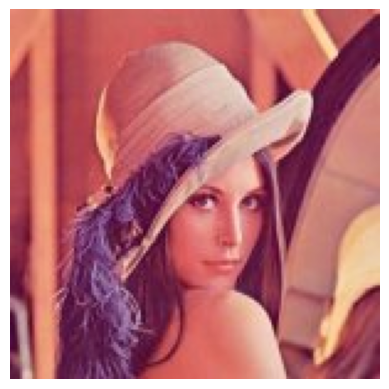

In [15]:
#Original Image
img = cv2.imread("Lenna.jpg",  cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('Off');
plt.imshow(img)

<b>Color Transformation</b>

In [16]:
#Self-implement color transformation
def ConvertGrayscale (img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]
    return Image.fromarray((red*0.3 + green*0.59 + blue*0.11).astype(np.uint8))

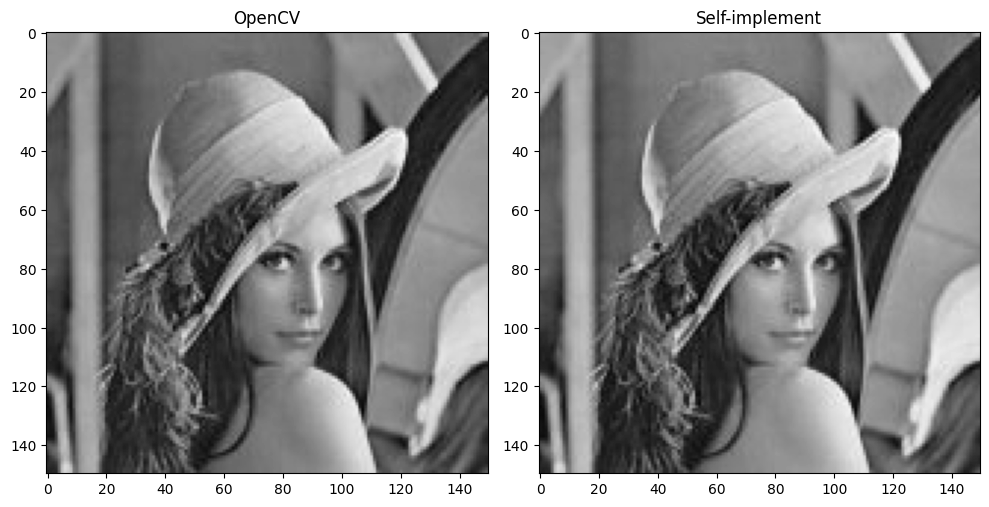

In [17]:
#Show and compare two images
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = ConvertGrayscale(img)
showImg(img_gray, img1)

<b>Geometry Transformation</b>

In [18]:
#Self-implemented geometry transform
def affine_transform_image(image, M):
    output_image = np.zeros_like(image)
    inv_M = np.linalg.inv(M)

    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            # Calculate the corresponding position in the input image
            p_out = np.array([j, i, 1], dtype=np.float32)
            p_in = inv_M @ p_out
            x_in = p_in[0] / p_in[2]
            y_in = p_in[1] / p_in[2]

            # Check if the transformed coordinates are within the image bounds
            if 0 <= x_in < image.shape[1] - 1 and 0 <= y_in < image.shape[0] - 1:
                # Perform bilinear interpolation
                x_l, y_l = int(np.floor(x_in)), int(np.floor(y_in))
                x_h, y_h = x_l + 1, y_l + 1

                alpha = x_in - x_l
                beta = y_in - y_l

                top_left = image[y_l, x_l]
                top_right = image[y_l, x_h]
                bottom_left = image[y_h, x_l]
                bottom_right = image[y_h, x_h]

                output_image[i, j] = (1 - alpha) * (1 - beta) * top_left + alpha * (1 - beta) * top_right + \
                                     (1 - alpha) * beta * bottom_left + alpha * beta * bottom_right

    return output_image

In [19]:
#Geometry transform
rows, cols, ch = img.shape
pts1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
 
pts2 = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])

A = np.vstack([pts1.T, [1, 1, 1]])
B = np.vstack([pts2.T, [1, 1, 1]])
M = np.linalg.solve(A.T, B.T).T
img1 = affine_transform_image(img, M)

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

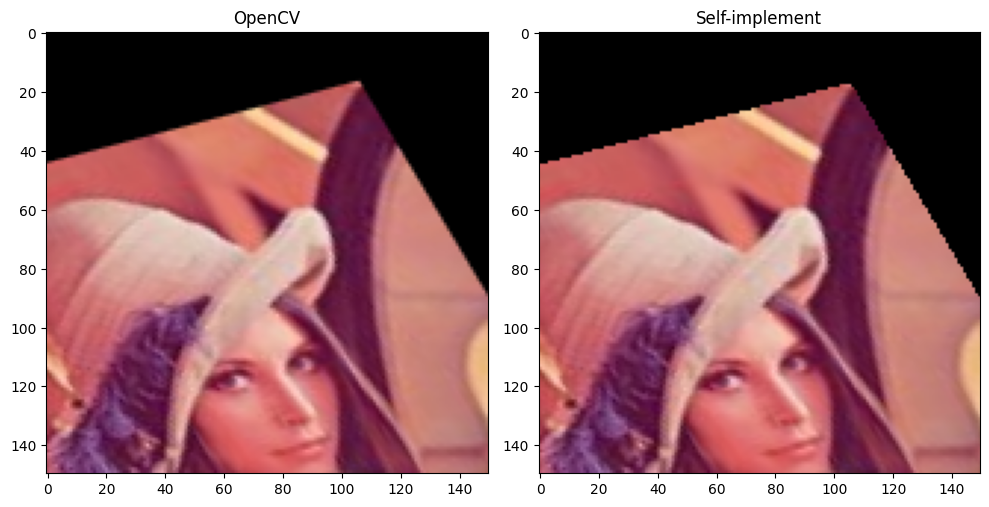

In [20]:
#Compare two image
showImg(dst,img1)

<b>Blur Image</b>

In [21]:
#Slef-implemented code to blur image
def average_blur(img):
    img_array = np.array(img)
    kernel = np.ones((3, 3), dtype= np.float32) / (3 ** 2)
    blurred = np.zeros_like(img_array, dtype= np.float32)
    for i in range(img_array.shape[2]):
        blurred[:,:,i] = np.convolve(img_array[:,:,i].flatten(), kernel.flatten(), mode='same').reshape(img_array.shape[:2])
    
    return Image.fromarray(np.clip(blurred, 0, 255).astype(np.uint8))    

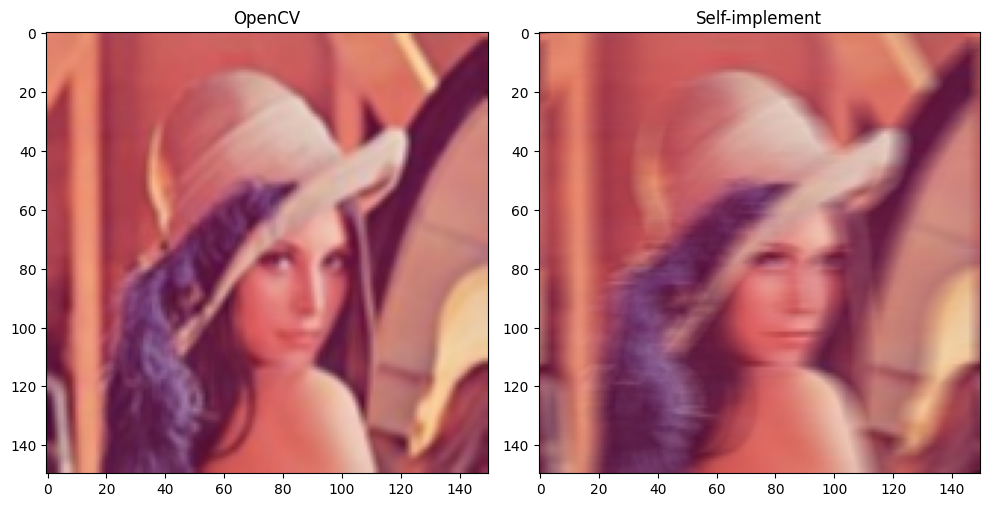

In [22]:
#Show and compare two image
img1 = average_blur(img)
img_blur = cv2.blur(img, (3, 3))
showImg(img_blur, img1)

<b>Smooth Image</b>

In [23]:
#Self-implemented code to smooth the image
def GaussianBlur(img):
    kernel = np.array([[1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]], dtype= float)
    img_1 = np.zeros_like(img, dtype= float)
    y, x, _ = np.shape(img)
    for i in range(1, y - 1):
        for j in range(1, x - 1):
            for k in range(3):
                img_1[i][j][k] = np.sum(img[i - 1: i + 2, j - 1: j + 2:,k] * kernel, dtype= float)
    img_1 = np.clip(img_1, 0, 255)
    return Image.fromarray(img_1.astype(np.uint8))

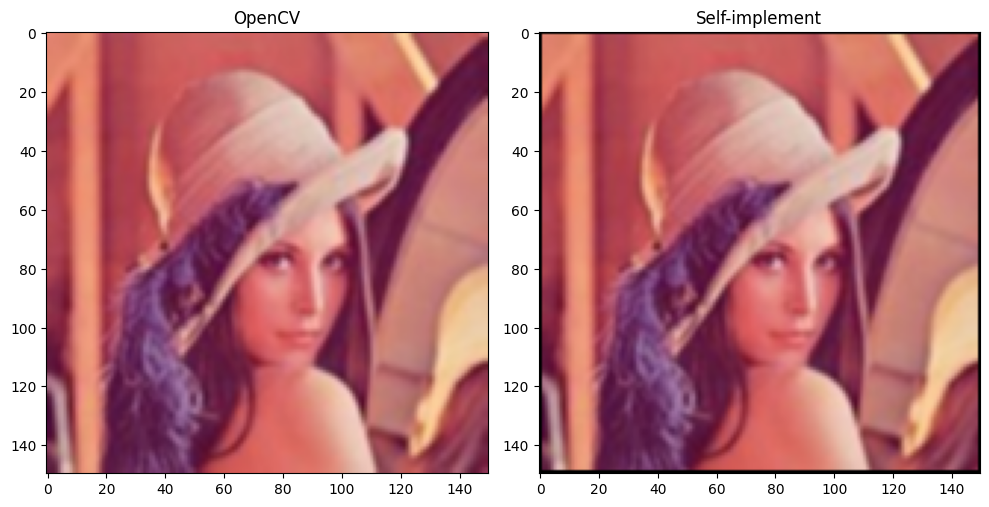

In [24]:
#Show and compare two image
img_blur = cv2.GaussianBlur(img, (3, 3), 0)
img1 = GaussianBlur(img)
showImg(img_blur, img1)